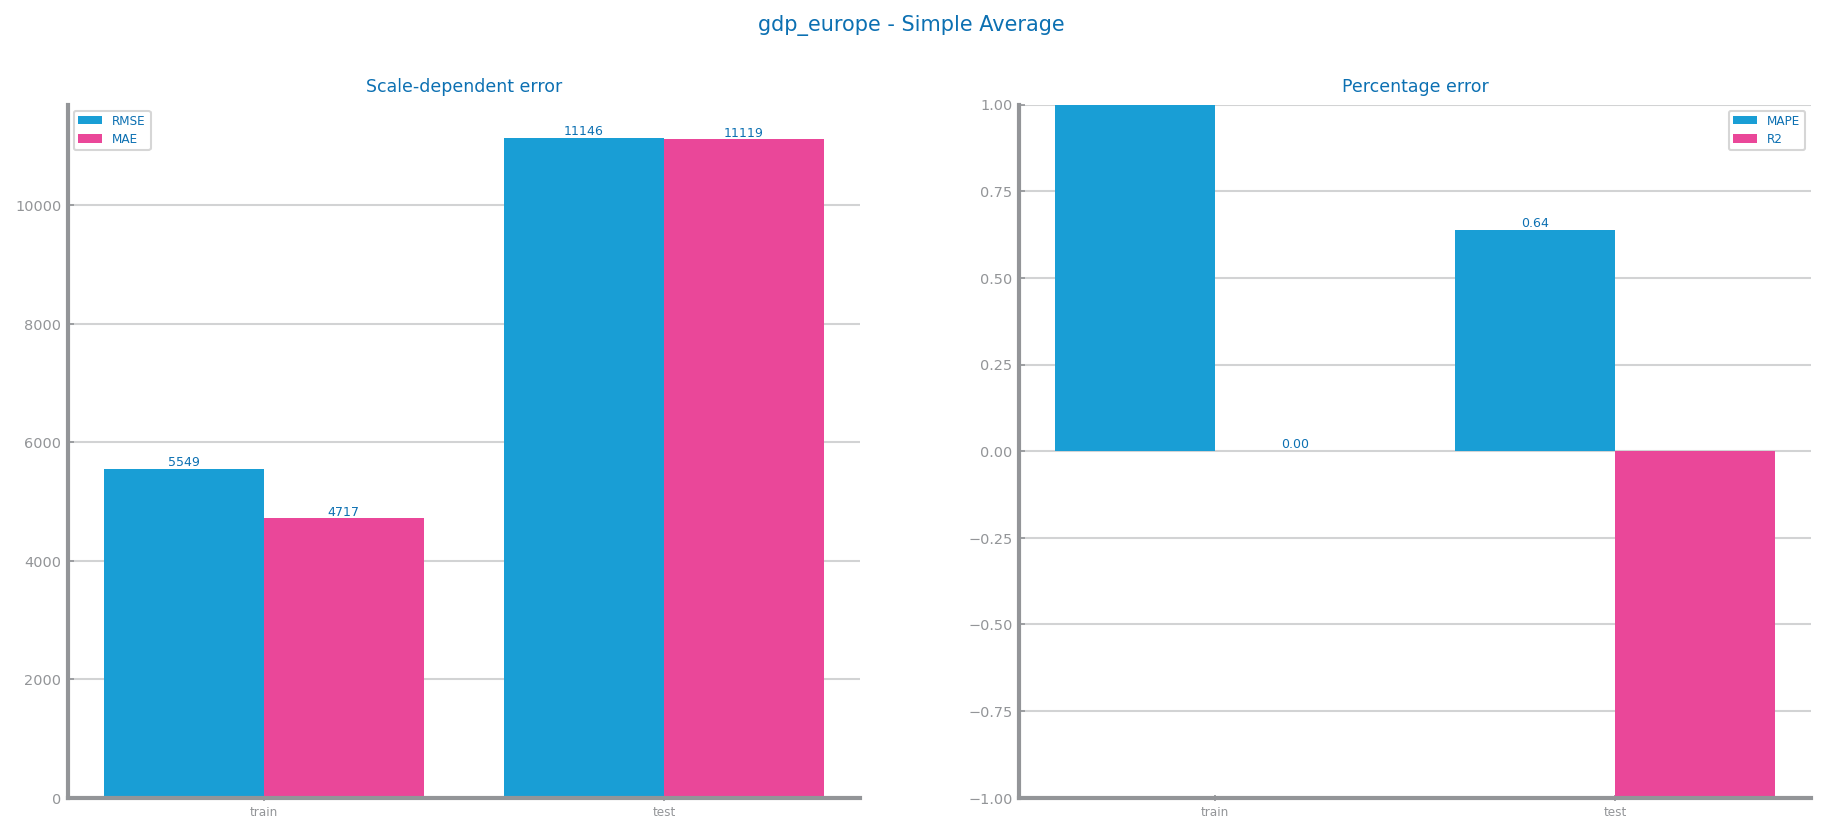

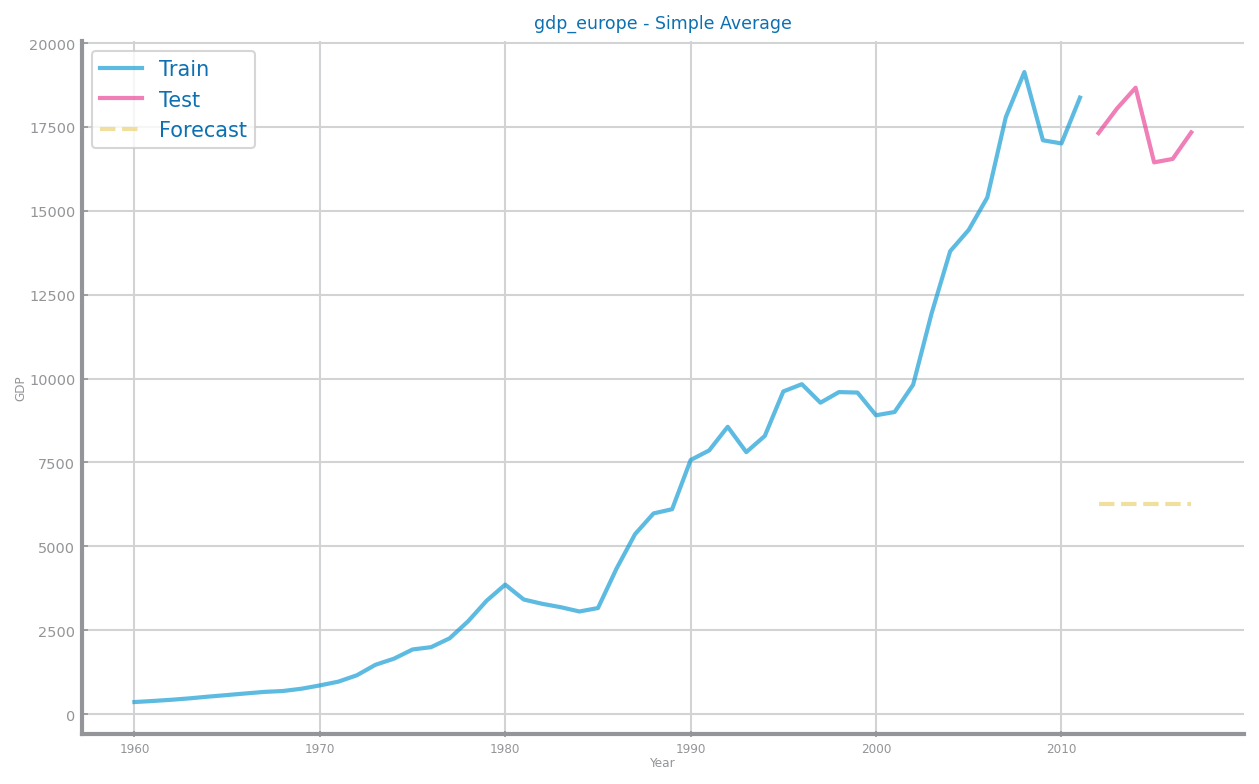

<Figure size 600x450 with 0 Axes>

In [2]:
from curses.ascii import alt
from sklearn.base import RegressorMixin
from pandas import read_csv, DataFrame, Series
from math import sqrt
from matplotlib.pyplot import subplots, savefig
from dslabs_functions import plot_multibar_chart, FORECAST_MEASURES
import os

# Ensure the output directory exists
output_dir = "images"
os.makedirs(output_dir, exist_ok=True)

# Define Simple Average Regressor
class SimpleAvgRegressor(RegressorMixin):
    def __init__(self):
        super().__init__()
        self.mean: float = 0.0
        return

    def fit(self, X: Series):
        self.mean = X.mean()
        return

    def predict(self, X: Series) -> Series:
        prd: list = len(X) * [self.mean]
        prd_series: Series = Series(prd)
        prd_series.index = X.index
        return prd_series

# Dataset configuration
filename: str = "/Users/dominikfrank/Library/Mobile Documents/com~apple~CloudDocs/Desktop/University/Master/Semester 1/PII/Data Science/Code for Project/DataScience/forecast_gdp_europe.csv"
file_tag: str = "gdp_europe"
target: str = "GDP"
timecol: str = "Year"

# Load dataset
data: DataFrame = read_csv(filename, index_col=timecol, sep=",", decimal=".", parse_dates=True)
series: Series = data[target]

# Train-test split (90% training data)
def series_train_test_split(data: Series, trn_pct=0.9):
    train_size = int(len(data) * trn_pct)
    return data.iloc[:train_size], data.iloc[train_size:]

train, test = series_train_test_split(series, trn_pct=0.90)

# Initialize and train the model
fr_mod = SimpleAvgRegressor()
fr_mod.fit(train)

# Generate predictions
prd_trn: Series = fr_mod.predict(train)
prd_tst: Series = fr_mod.predict(test)

# Plot evaluation
def plot_forecasting_eval(trn: Series, tst: Series, prd_trn: Series, prd_tst: Series, title: str = "") -> list:
    ev1: dict = {
        "RMSE": [
            sqrt(FORECAST_MEASURES["MSE"](trn, prd_trn)),
            sqrt(FORECAST_MEASURES["MSE"](tst, prd_tst))
        ],
        "MAE": [
            FORECAST_MEASURES["MAE"](trn, prd_trn),
            FORECAST_MEASURES["MAE"](tst, prd_tst)
        ],
    }
    ev2: dict = {
        "MAPE": [
            FORECAST_MEASURES["MAPE"](trn, prd_trn),
            FORECAST_MEASURES["MAPE"](tst, prd_tst)
        ],
        "R2": [
            FORECAST_MEASURES["R2"](trn, prd_trn),
            FORECAST_MEASURES["R2"](tst, prd_tst)
        ],
    }

    fig, axs = subplots(1, 2, figsize=(15, 6), squeeze=True)
    fig.suptitle(title)
    plot_multibar_chart(["train", "test"], ev1, ax=axs[0], title="Scale-dependent error", percentage=False)
    plot_multibar_chart(["train", "test"], ev2, ax=axs[1], title="Percentage error", percentage=True)
    savefig(f"{output_dir}/{file_tag}_simpleAvg_eval.png")
    return axs

plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - Simple Average")

# Plot forecasting series
import matplotlib.pyplot as plt

def plot_forecasting_series(train: Series, test: Series, prd: Series, title: str, xlabel: str, ylabel: str):
    plt.figure(figsize=(10, 6))
    plt.plot(train, label="Train", alpha=0.7)
    plt.plot(test, label="Test", alpha=0.7)
    plt.plot(prd, label="Forecast", linestyle="--", alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_forecasting_series(
    train,
    test,
    prd_tst,
    title=f"{file_tag} - Simple Average",
    xlabel=timecol,
    ylabel=target,
)
plt.savefig(f"{output_dir}/{file_tag}_simpleAvg_forecast.png")